# 1. Libraries used for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

# 2. Input data - test and training set

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 3. Analysis of main properties of tables with pandas

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As it is recognized, there are five columns that their Dtype corresponds to the object, meaning that there could be missing data or mixed value types on the same column:

1. Name
2. Sex
3. Ticket
4. Cabin
5. Embarked

In [6]:
train[["Name","Sex","Ticket"]].isna().value_counts()

Name   Sex    Ticket
False  False  False     891
dtype: int64

In the first three, there is no missing data, implying that there must be a problem in format, then starting with Name:

In [7]:
train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In this first column, it seems that all the data is in string format and also it could be a reference to identifying things such as a profession, for example, in the case of Montvilla, Rev. Juozas. Then with Sex data:

In [8]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There is either a female or male, being a candidate to transform the column into categories

In [9]:
train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In the case of the ticket, there is a mix of numbers and letters.

In [10]:
train["Cabin"].isna().value_counts()[0]

204

Then in cabin there are NaN values, showing that most of the column has no data related to the Cabin

In [11]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Finally, in the Embarked column there are only 3 categories S, C, and Q, being a candidate to be a categorization column. After this initial analysis with a for loop, it was made the counting of unique categories of all the dataframes alongside the counting of NaN. With these values, it would be constructed the main data for modeling

In [12]:
for i in train.columns:
    print("Number of unique values of column " + i + ": " + str(len(train[i].unique())))

Number of unique values of column PassengerId: 891
Number of unique values of column Survived: 2
Number of unique values of column Pclass: 3
Number of unique values of column Name: 891
Number of unique values of column Sex: 2
Number of unique values of column Age: 89
Number of unique values of column SibSp: 7
Number of unique values of column Parch: 7
Number of unique values of column Ticket: 681
Number of unique values of column Fare: 248
Number of unique values of column Cabin: 148
Number of unique values of column Embarked: 4


In [13]:
for i in train.columns:
    print("Number of NaN values of column " + i + ": " + str(len(train[i])-train[i].isna().value_counts()[0]))

Number of NaN values of column PassengerId: 0
Number of NaN values of column Survived: 0
Number of NaN values of column Pclass: 0
Number of NaN values of column Name: 0
Number of NaN values of column Sex: 0
Number of NaN values of column Age: 177
Number of NaN values of column SibSp: 0
Number of NaN values of column Parch: 0
Number of NaN values of column Ticket: 0
Number of NaN values of column Fare: 0
Number of NaN values of column Cabin: 687
Number of NaN values of column Embarked: 2


Alongside the previous analysis, it is seen that Age and Cabin columns have a lot of missing values, for this reason before creating the modified dataset these columns are going to be analyzed.

In [14]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Before constructing the final matrix it is going to be built a preliminary statistical analysis without the Cabin column and rows with null age values. At the same time, a train copy is going to be used to assign new categories to each column related to the preliminary results and data description.

## Initial Data Transformation

In [15]:
train_stat=train.copy()
train_stat.drop(columns="Cabin",inplace=True)

In [16]:
train_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
train_stat["Survived"]=train_stat["Survived"].astype("category") # Related to survival or not
train_stat["Pclass"]=pd.Categorical(train_stat["Pclass"], categories=[3,2,1], ordered=True) # Ordered related to status SES
train_stat["Sex"]=train_stat["Sex"].astype("category")
train_stat["Embarked"].fillna("N",inplace=True)
train_stat["Embarked"]=train_stat["Embarked"].astype("category")

In [18]:
train_stat.dropna(inplace=True)

In [19]:
train_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    category
 2   Pclass       714 non-null    category
 3   Name         714 non-null    object  
 4   Sex          714 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        714 non-null    int64   
 7   Parch        714 non-null    int64   
 8   Ticket       714 non-null    object  
 9   Fare         714 non-null    float64 
 10  Embarked     714 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 48.0+ KB


## Correlations and statistical Analysis

In this case, it is going to be made correlation analysis alongside other exploratory data analyses

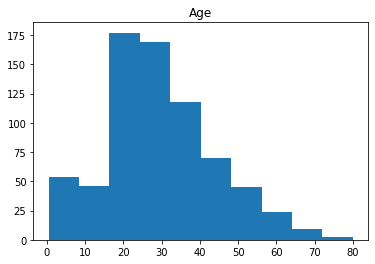

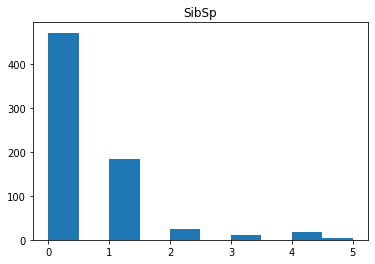

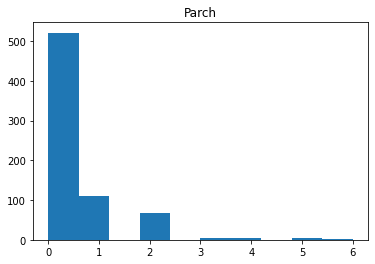

In [20]:
#Histograms
data_hist=["Age","SibSp","Parch"]
for dat in data_hist:
    plt.figure()
    plt.hist(train_stat[dat])
    plt.title(dat)

Alongside the numerical values, it was made an initial correlation matrix:

<AxesSubplot:>

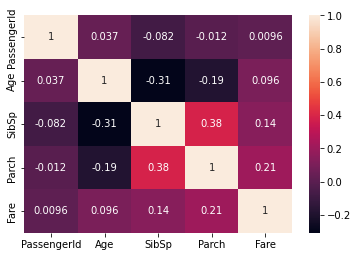

In [21]:
sns.heatmap(train_stat.corr(),annot=True)

In complement, there was made a boxplot relating the main variables with age:

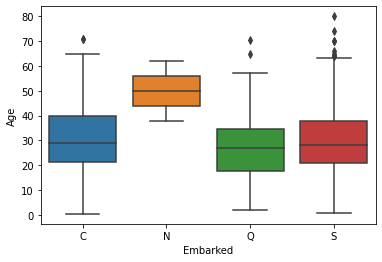

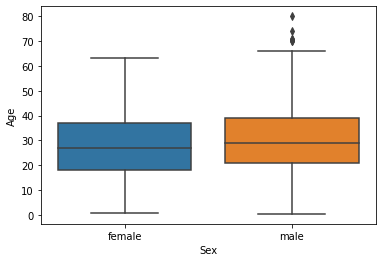

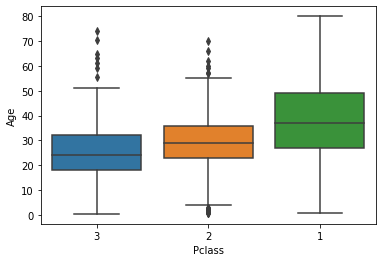

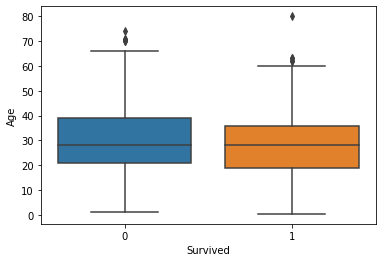

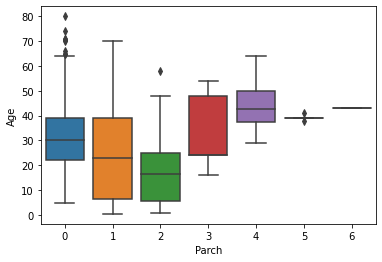

In [22]:
categorical=["Embarked","Sex","Pclass","Survived","Parch"]
for i in categorical:
    plt.figure()
    sns.boxplot(x=i,y="Age",data=train_stat)

With these analyses, it is seen that there is not a significant correlation between numerical parameters and that regarding the estimation of age the P-class could be useful as the average of the Higher class is higher than the others, without considering for example the data dispersion

## Linear regression analysis

In [23]:
formula= 'Age ~ Embarked + Sex + Pclass + Survived + Parch + SibSp'
model=sm.ols(formula = formula, data= train_stat)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     30.35
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           6.39e-45
Time:                        23:56:29   Log-Likelihood:                -2806.2
No. Observations:                 714   AIC:                             5632.
Df Residuals:                     704   BIC:                             5678.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        27.4897      1.735     15.845      0.000      24.083      30.896
Embarked[T.N]    13.3201      8.876      1.501      0.134      -4.107      30.747
Embarked[T.Q]     4.6477      2.667      1.743      0.082      -0.588       9.883
Embarked[T.S]     2.4821      1.292      1.921      0.055      -0.055       5.019
Sex[T.male]      -0.2576      1.186     -0.217      0.828      -2.585       2.070
Pclass[T.2]       5.6712      1.190      4.766      0.000       3.335       8.008
Pclass[T.1]      15.9758      1.253     12.753      0.000      13.516      18.435
Survived[T.1]    -6.7857      1.197     -5.669      0.000      -9.136      -4.436
Parch            -0.9488      0.607     -1.564      0.118      -2.140       0.243
SibSp            -4.1809      0.545     -7.675      0.000      -5.250      -3.111
==============================================================================
Omnibus:                       23.147   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.516
Skew:                           0.440   Prob(JB):                     4.75e-06
Kurtosis:                       3.224   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected and with a reference P value of 0.05, only the variables of P-class, Survived, and SibSp are significant to estimate the missing ages. For this reason, the model is updated with these values and it will be used to obtain an approximate of the missing values and to be able to make the respective prediction

In [24]:
formula2= 'Age ~ Pclass + Survived + SibSp'
model2=sm.ols(formula = formula2, data= train_stat)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     65.59
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           3.25e-47
Time:                        23:56:29   Log-Likelihood:                -2810.9
No. Observations:                 714   AIC:                             5632.
Df Residuals:                     709   BIC:                             5655.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4323      0.762     38.607      0.000      27.936      30.929
Pclass[T.2]       5.7161      1.182      4.834      0.000       3.395       8.037
Pclass[T.1]      15.4130      1.206     12.784      0.000      13.046      17.780
Survived[T.1]    -7.0092      1.017     -6.893      0.000      -9.006      -5.013
SibSp            -4.4604      0.503     -8.870      0.000      -5.448      -3.473
==============================================================================
Omnibus:                       20.861   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.998
Skew:                           0.403   Prob(JB):                     1.67e-05
Kurtosis:                       3.297   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, these models will be tested with the specific rows and this same development would be resumed in the next notebook with the overall final prediction of surviving

In [25]:
train_age=train[train["Age"].isna()]
train_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [26]:
train_predict=train_age[["Pclass","Survived", "SibSp"]]
train_predict

,Pclass,Survived,SibSp
5,3,0,0
17,2,1,0
19,3,1,0
26,3,0,0
28,3,1,0
...,...,...,...
859,3,0,0
863,3,0,8
868,3,0,0
878,3,0,0


In [27]:
model_predict = LinearRegression()
model_predict.fit(train_stat[["Pclass","Survived", "SibSp"]],train_stat["Age"])
age_predict=model_predict.predict(train_predict)

As there are negative values, for implementation purposes these values will be transformed into all positive:

In [28]:
age_predict=list(abs(age_predict))

In [29]:
age_predict[:10]

[29.066091038460538,
 29.56010753179032,
 22.001890359651405,
 29.066091038460538,
 22.001890359651405,
 29.066091038460538,
 32.69584065086397,
 22.001890359651405,
 22.001890359651405,
 29.066091038460538]

Replacement of new values in initial train value:

In [30]:
nan_rows=list(train_predict.index)
nan_rows[:10]

[5, 17, 19, 26, 28, 29, 31, 32, 36, 42]

In [31]:
count=0
for i in nan_rows:
    train.loc[i,"Age"]=int(age_predict[count])
    count=count+1

In [32]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Finally, the same method is implemented on the test table with the same Linear Regression Model approach but without the Survived column:

In [33]:
test_age=test[test["Age"].isna()]
test_age

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
test_predict_2=test_age[["Pclass", "SibSp"]]
model_predict_2 = LinearRegression()
model_predict_2.fit(train_stat[["Pclass", "SibSp"]],train_stat["Age"])
age_predict_2=model_predict_2.predict(test_predict_2)

In [35]:
nan_rows=list(test_predict_2.index)
nan_rows[:10]

[10, 22, 29, 33, 36, 39, 41, 47, 54, 58]

In [36]:
count=0
for i in nan_rows:
    test.loc[i,"Age"]=int(abs(age_predict_2[count]))
    count=count+1

In [37]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S
